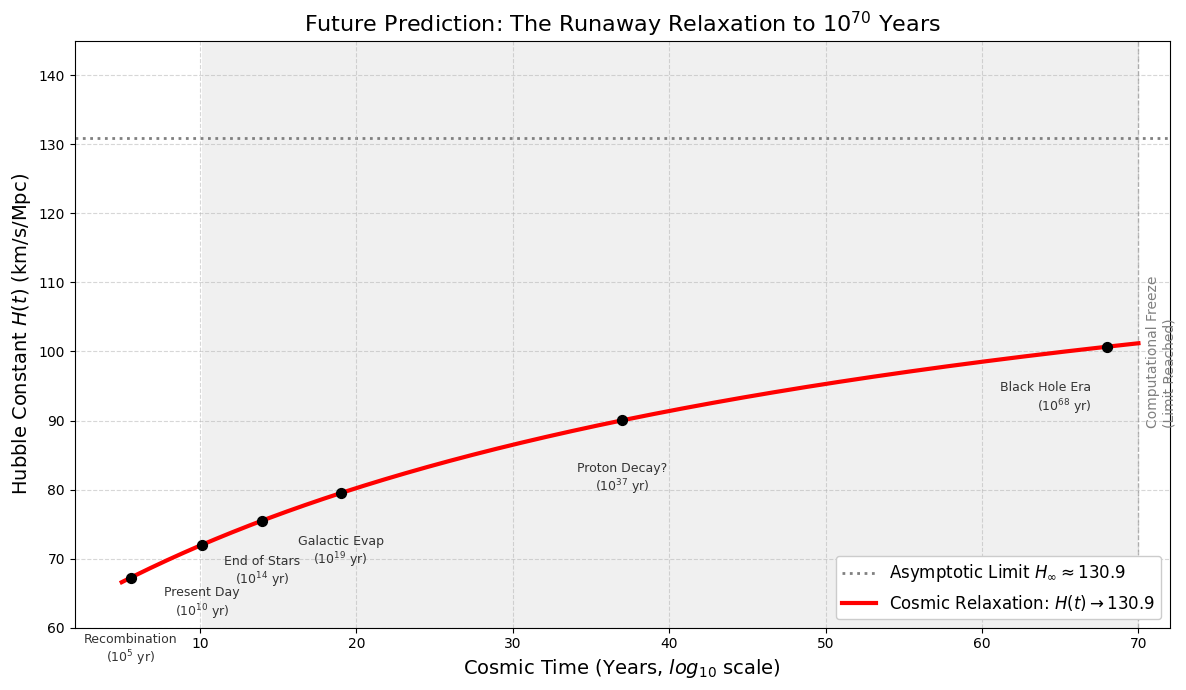

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# === 1. 模型参数 (基于最新的真实拟合结果) ===
beta_fit = -8255.06
H_inf_fit = 130.88

# === 2. 物理常量 ===
t_planck_sec = 5.39e-44
sec_per_year = 3.1536e7

# === 3. 核心计算函数 ===
def get_H_at_logt(log_t):
    t_years = 10**log_t
    t_sec = t_years * sec_per_year
    n_steps = t_sec / t_planck_sec
    xi = 1 / np.log(n_steps)
    return H_inf_fit + beta_fit * xi

# === 4. 准备绘图数据 ===
# 曲线画到 70 就行，暗示之后也没意义了
log_t_axis = np.linspace(5, 70, 500)
H_axis = get_H_at_logt(log_t_axis)

# === 5. 关键节点数据 ===
key_points = [
    (5.58,  "Recombination\n($10^5$ yr)",       0, -8),
    (10.14, "Present Day\n($10^{10}$ yr)",     0, -6),
    (14.0,  "End of Stars\n($10^{14}$ yr)",     0, -5),
    (19.0,  "Galactic Evap\n($10^{19}$ yr)",    0, -6),
    (37.0,  "Proton Decay?\n($10^{37}$ yr)",    0, -6),
    (68.0,  "Black Hole Era\n($10^{68}$ yr)",   0, -5)
]

points_x = [p[0] for p in key_points]
points_y = [get_H_at_logt(x) for x in points_x]

# === 6. 绘图 ===
plt.figure(figsize=(12, 7))
ax = plt.gca()

# --- 背景设置：灰色只到 70 (The End) ---
# 从现在 (10.14) 到 70 (Freeze)
ax.axvspan(10.14, 70, facecolor='#f0f0f0', alpha=1.0, zorder=0)

# 在 70 处画一条终止线，强调"Over"
ax.axvline(x=70, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax.text(70.5, 100, 'Computational Freeze\n(Limit Reached)', rotation=90, va='center', ha='left', color='gray', fontsize=10)

# --- 渐进线 ---
ax.axhline(H_inf_fit, color='gray', linestyle=':', linewidth=2, zorder=1,
           label=fr'Asymptotic Limit $H_\infty \approx {H_inf_fit:.1f}$')

# --- 主曲线 ---
ax.plot(log_t_axis, H_axis, color='red', linewidth=3, zorder=2,
        label=fr'Cosmic Relaxation: $H(t) \to {H_inf_fit:.1f}$')

# --- 关键点与标签 ---
ax.scatter(points_x, points_y, color='black', s=50, zorder=3)

for i, (log_t, label, off_x, off_y) in enumerate(key_points):
    x = points_x[i]
    y = points_y[i]
    va = 'top'
    ha = 'center'
    # 最后一个点靠左一点，防止出界
    if i == len(key_points) - 1: 
        ha = 'right'
        off_x -= 1 # 稍微往左挪一点
    
    ax.text(x + off_x, y + off_y, label, ha=ha, va=va, fontsize=9, color='#333333')

# === 7. 坐标轴与美化 ===
# X轴稍微留一点白边 (到72)，为了展示出 70 是个边界
ax.set_xlim(2, 72)
ax.set_ylim(60, 145)

# X轴刻度：只显示到 70
xticks = np.arange(10, 80, 10)
ax.set_xticks(xticks)

ax.set_xlabel(r'Cosmic Time (Years, $log_{10}$ scale)', fontsize=14)
ax.set_ylabel(r'Hubble Constant $H(t)$ (km/s/Mpc)', fontsize=14)
ax.set_title(fr'Future Prediction: The Runaway Relaxation to $10^{{70}}$ Years', fontsize=16)

ax.grid(True, linestyle='--', alpha=0.5, zorder=0)
ax.legend(loc='lower right', fontsize=12, framealpha=1)

plt.tight_layout()
plt.savefig('Wang_Hubble_Future_Final_70Limit.png', dpi=300)
plt.show()